In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.insert(0, '../')
from scripts_second_phase.tracking import MatchTracking 
from scripts_second_phase.pass_events import PassEvents

In [2]:
# Relou de toujours devoir aller chercher le nom du match correspondant dans statsbomb : création d'un mapping
tracking_to_event  = {
    'g2312135' : 'ManCity_Arsenal',
    'g2312152' : 'ManCity_LeicesterCity',
    'g2312166' : 'ManCity_Liverpool',
    'g2312183' : 'ManCity_Brighton',
    'g2312201' : 'ManCity_AstonVilla',
    'g2312213' : 'ManCity_Tottenham'
}
event_to_tracking = {v: k for k, v in tracking_to_event.items()}

In [3]:
game = 'ManCity_Liverpool'

In [4]:
match_tracking = MatchTracking(tracking_file=event_to_tracking[game], event_file=game)

##### On check que les équipes attaquent toujours bien vers la droite

Home team première mi temps

In [5]:
df_home = match_tracking.HomeTracking.df_tracking.copy()

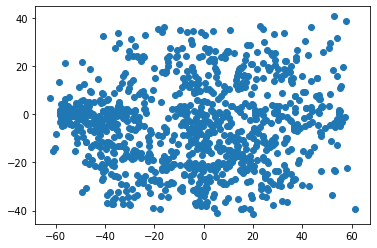

In [6]:
df_home1 = df_home[df_home['period']==1].sample(1000)
plt.scatter(df_home1.x,df_home1.y)
plt.show()

Home team deuxième mi temps

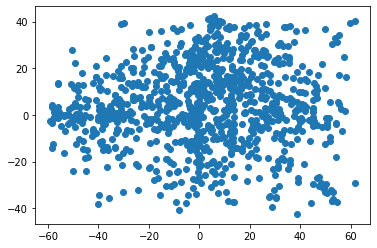

In [7]:
df_home2 = df_home[df_home['period']==2].sample(1000)
plt.scatter(df_home2.x,df_home2.y)
plt.show()

Away team première mi temps

In [8]:
df_away = match_tracking.AwayTracking.df_tracking.copy()

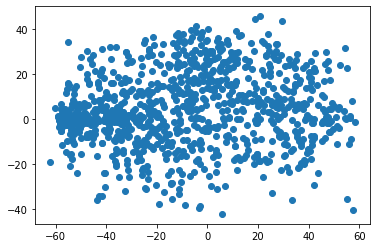

In [9]:
df_away1 = df_away[df_away['period']==1].sample(1000)
plt.scatter(df_away1.x,df_away1.y)
plt.show()

Away team deuxième mi temps

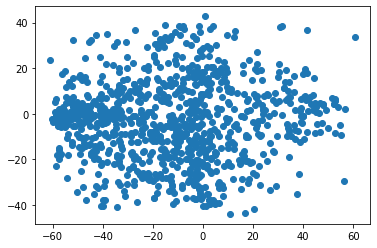

In [10]:
df_away2 = df_away[df_away['period']==2].sample(1000)
plt.scatter(df_away2.x,df_away2.y)
plt.show()

Les équipes attaquent toujours bien vers la droite

In [11]:
pass_events = PassEvents(event_file=game)
pass_events.df_pass_away

,period,gameClock,team.name,duration,x,y,end_location_x,end_location_y,player.id,player.name,pass.recipient.id,pass.recipient.name,player.jersey_nb,pass.recipient.jersey_nb,pass.body_part.name,pass.height.name,pass.outcome.name
4,1,1.168,Liverpool WFC,1.161132,1.0,-0.1,-14.9,54.9,4972.0,Katie Stengel,15706.0,Rachel Furness,24,10.0,Right Foot,Ground Pass,NaN
7,1,3.204,Liverpool WFC,3.021640,-15.0,-5.2,-46.0,86.0,15706.0,Rachel Furness,33664.0,Rachael Laws,10,1.0,Left Foot,Ground Pass,NaN
10,1,7.981,Liverpool WFC,1.999998,-44.2,2.2,-43.7,83.7,33664.0,Rachael Laws,23465.0,Megan Campbell,1,28.0,Right Foot,Ground Pass,NaN
13,1,10.358,Liverpool WFC,2.399997,-43.7,24.2,-53.4,93.4,23465.0,Megan Campbell,33664.0,Rachael Laws,28,1.0,Left Foot,Ground Pass,NaN
16,1,15.062,Liverpool WFC,1.999998,-52.3,1.2,-51.1,91.1,33664.0,Rachael Laws,18151.0,Gilly Louise Scarlett Flaherty,1,25.0,Right Foot,Ground Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,2,2976.789,Liverpool WFC,1.628096,-24.6,22.8,-11.5,51.5,19777.0,Niamh Fahey,15618.0,Jasmine Matthews,5,6.0,Right Foot,Ground Pass,NaN
3062,2,2979.635,Liverpool WFC,1.140891,-11.5,37.0,6.7,33.3,15618.0,Jasmine Matthews,23465.0,Megan Campbell,6,28.0,Left Foot,Ground Pass,NaN
3066,2,2980.856,Liverpool WFC,2.410271,5.7,37.9,25.9,14.1,23465.0,Megan Campbell,4972.0,Katie Stengel,28,24.0,Left Foot,Ground Pass,Incomplete
3077,2,2996.112,Liverpool WFC,3.282603,-1.0,6.6,-27.5,67.5,19777.0,Niamh Fahey,33664.0,Rachael Laws,5,1.0,Right Foot,Ground Pass,NaN


In [12]:
df_home = pass_events.df_pass_home.copy()

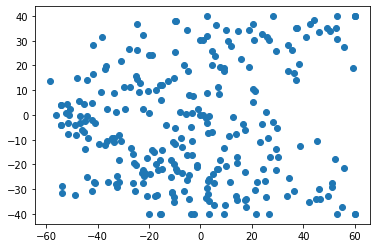

In [13]:
df_home1 = df_home[df_home['period']==1]
plt.scatter(df_home1.x,df_home1.y)
plt.show()

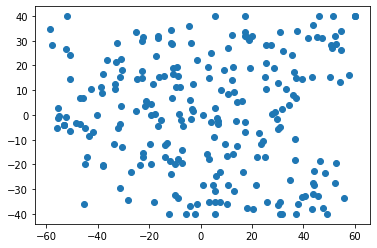

In [14]:
df_home2 = df_home[df_home['period']==2]
plt.scatter(df_home2.x,df_home2.y)
plt.show()

In [15]:
df_away = pass_events.df_pass_away.copy()

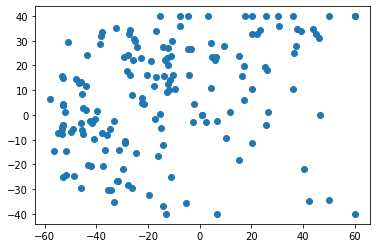

In [16]:
df_away1 = df_away[df_away['period']==1]
plt.scatter(df_away1.x,df_away1.y)
plt.show()

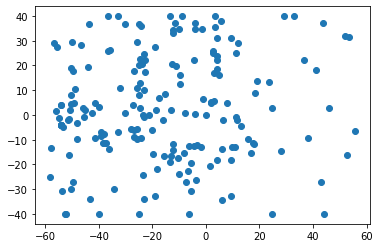

In [17]:
df_away2 = df_away[df_away['period']==2]
plt.scatter(df_away2.x,df_away2.y)
plt.show()

In [18]:
pass_events.update_position(match_tracking=match_tracking)

<AxesSubplot: >

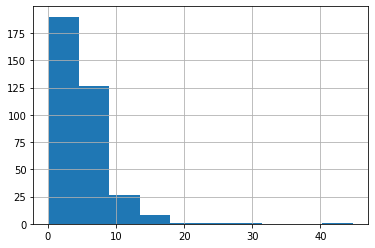

In [19]:
pass_events.df_pass_away['err'].hist()

In [20]:
pass_events.df_pass_away.describe()

,period,gameClock,duration,x,y,end_location_x,end_location_y,player.id,pass.recipient.id,player.jersey_nb,pass.recipient.jersey_nb,jersey_number,x_passer,y_passer,jersey_number_recipient,x_recipient,y_recipient,err
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,293.000000,354.000000,293.000000,354.000000,354.000000,354.000000,293.000000,293.000000,293.000000,354.000000
mean,1.528249,1386.901751,2.017307,-15.011017,4.608192,-6.024011,46.024011,22320.375706,20980.665529,11.864407,12.334471,11.864407,-14.888912,3.955777,12.334471,-12.174363,3.771326,5.099584
std,0.499908,836.891439,0.948753,28.850717,21.709053,31.454430,31.454430,7616.806328,7911.049597,10.173494,9.667277,10.173494,28.131003,22.510405,9.667277,28.298460,21.694858,4.128272
min,1.000000,1.168000,0.011794,-58.100000,-40.000000,-58.900000,-20.000000,4972.000000,4972.000000,1.000000,1.000000,1.000000,-59.282691,-40.256790,1.000000,-59.032361,-38.885340,0.094086
25%,1.000000,711.214000,1.404038,-38.575000,-11.200000,-28.100000,24.000000,15706.000000,15706.000000,4.250000,5.000000,4.250000,-37.893701,-12.348962,5.000000,-34.943789,-13.170650,2.539510
50%,2.000000,1320.910000,1.981222,-17.600000,3.550000,-9.500000,49.500000,19777.000000,19777.000000,7.000000,10.000000,7.000000,-17.323972,2.559646,10.000000,-12.004460,3.156700,4.274397
75%,2.000000,1954.064000,2.536759,4.150000,23.000000,16.000000,68.100000,24237.000000,24237.000000,24.000000,24.000000,24.000000,2.639843,24.053580,24.000000,4.722134,23.231892,6.405476
max,2.000000,2999.451000,6.484939,60.000000,39.900000,60.000000,98.900000,42834.000000,42834.000000,28.000000,28.000000,28.000000,54.833644,41.510012,28.000000,57.712439,39.736585,44.763639


<AxesSubplot: >

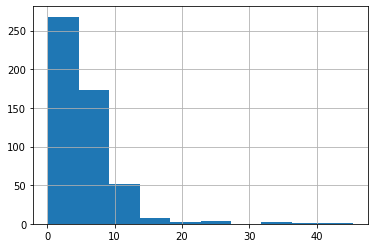

In [25]:
pass_events.df_pass_home['err'].hist()